Machine learning coursework2

Before starting, read the README.txt file.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Simple Linear Regression  (30 points)

### Background

Remember from the course material: In Linear Regression, we aim to find the line that fits the given data as well as possible. The line formula is:

### <center> $$ \hat{y} = f(x) = \beta_0 + \beta_1 x $$ <center> 

And using linear regression, the goal is to find the $\beta_0$ and $\beta_1$ such that the the Mean Squared Error (MSE) is minimized:
    
### <center> $$ MSE \Rightarrow \mathcal{L} = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i ))^2 $$ <center> 
    
As the MSE error gets smaller, the line starts to represent the data better and better.
    
Consider $\beta = (\beta_0 + \beta_1)$. In order to find the $\beta$ that minimizes the MSE loss, we use **Gradient Descent**. Iteratively $\beta$ is updated in the opposite direction of the gradient, while the size of the update is controlled with the learning rate $\eta$:
    
### <center> $$ \beta \leftarrow \beta-\eta \frac{d \mathcal{L}}{d \beta} $$ <center> 

### Your Task

In this part, you are going to code up Simple Linear Regression on the data given in **data1.csv**, and find the line that fits the data best. To do so, you'll need to complete the following:

- Code up the gradient descent, and print the loss value at every time step. You can use the number of steps as the stopping criteria (e.g. stopping gradient descent after 10 steps). 
- At the end of the algorithm, plot the obtained regression line with the data .
    
I recommend you to use the given learning rate and number of iterations in the code , but you are free to change them to make your algorithm faster if you'd like. You are not allowed to use any libraries other than the imported ones at the beginning. You can initialize the $\beta$ randomly.

In [3]:
def MSE(y_true, y_pred):
    n = len(y_true)
    return np.sum((y_true - y_pred)**2) / n

In [4]:
def load_data():
    df = pd.read_csv("data1.csv")
    x = df['x'].values
    y = df['y'].values
    return x, y


def gradient_descent(x, y, learning_rate = 0.1, max_its = 500):
    #TO DO: Initialize the beta values
    beta0 = np.random.random()
    beta1 = np.random.random()
    losses = []
    n = len(y)

    # start gradient descent loop
    for k in range(0,max_its):
        # TO DO: calculate derivative (grad)
        f = y - (beta0 + beta1 * x)
        
        
        # TO DO: take gradient descent step
        beta0 -= -learning_rate * (2 / n) * (f.sum())
        beta1 -= -learning_rate * (2 / n) * (x.dot(f).sum())
        
        
        # TO DO: calculate and print the loss value
        y_pred = beta0 + beta1 * x
        loss = MSE(y, y_pred)
        losses.append(loss)
        
        print(f"Iteration {k} finished with loss - {loss}")
        

    return beta0, beta1, losses

In [5]:
x, y = load_data()
beta0, beta1, losses = gradient_descent(x, y, max_its=10)


Iteration 0 finished with loss - 0.6432544540312573
Iteration 1 finished with loss - 0.37468893196657305
Iteration 2 finished with loss - 0.21867321751190608
Iteration 3 finished with loss - 0.12803868904687712
Iteration 4 finished with loss - 0.07538471249472961
Iteration 5 finished with loss - 0.04479403676464794
Iteration 6 finished with loss - 0.027020200344287804
Iteration 7 finished with loss - 0.016691857088701575
Iteration 8 finished with loss - 0.010688746588976044
Iteration 9 finished with loss - 0.007198282298711858


Text(0.5, 1.0, 'losses')

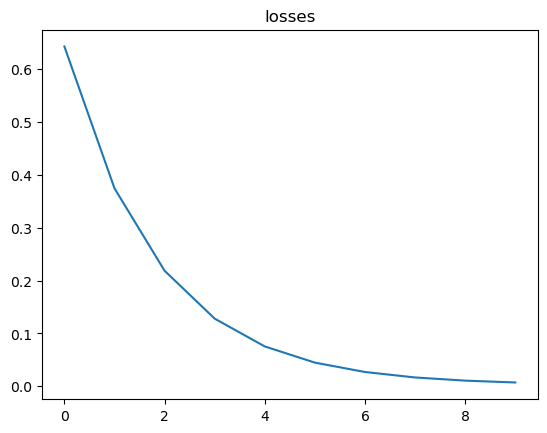

In [6]:
plt.plot(np.array(losses))
plt.title("losses")

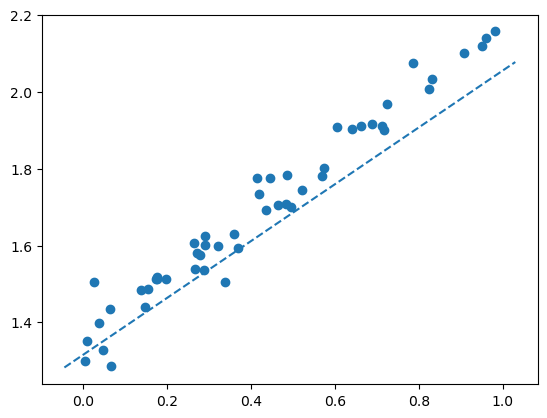

In [7]:
plt.scatter(x, y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = beta0 + beta1 * x_vals
plt.plot(x_vals, y_vals, '--')
plt.show()


# Part 2: Multi Linear Regression on California House Pricing Dataset using 5-fold Cross Validation (50 points)

In this part, you are going to train a Multi Linear Regression Model on a real dataset! The dataset we are going to use is **California House Pricing Dataset**. The target is to predict the median house value in California, given the 8 features ( You can examine the name of the features when you run the load_data function given below ). In this part, you will also use Cross-Validation with 5 folds, in addition to everything you implemented in Part 1. You will also alter your code so that it works with multiple attribute. In this case, you will have 8 features and you can code up assuming you will always have 8 features. At the end, you will report your results. 

In summary, you will need to do the following:

- Code up gradient descent with Cross Validation for Multi Linear Regression
- Find the best working learning rate and number of iterations setup.
- Report the MSE loss periodically during training in folds (For example, if you are training for 1000 steps, you can print MSE loss for each 100 steps. If you are training for 100000 steps ( which you can, if you'd like ), you can print MSE loss for each 10000 steps. In total, if you print the loss 10 times periodically for each fold, it's fine ).
- Save the final MSE results on the testing set on each fold in an array. Print the average testing MSE losses at the end of the algorithm. Additionally, print the variance of the testing MSE losses. 

In this part, I am giving you only the load_data function, It is up to you to find the working learning rate and number of iterations setup. In addition to the libraries imported for Part 1, you are allowed to use sklearn for fetching dataset (which is already done for you), and the KFold class for the cross-validation. Other than that, you are not allowed to use sklearn or any other additional libraries.



In [16]:
np.random.seed(42) #ensure reproducibility
#Custom Linear Regression Model

class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, verbosity = True, verbose_after_every = 10):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.verbosity = verbosity
        self.verbose_after_every = verbose_after_every
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for iter in range(self.max_iter):
            # Calculate predicted values
            y_pred = self.predict(X)

            # Calculate the gradients
            dw = (1/num_samples) * np.dot(X.T, (y_pred - y))
            db = (1/num_samples) * np.sum(y_pred - y)

            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print the training epochs with their respective MSE
            if (self.verbosity and iter % self.verbose_after_every == 0):
                y_pred = self.predict(X)
                cost = self.score(y, y_pred)
                print(f'Iteration {iter} finished with MSE - {cost}')

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def score(self,y_true, y_pred):
        return np.mean((y_pred - y_true)**2)


In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold
def load_data():
    data= fetch_california_housing()
    print("Features of Boston Housing Prices dataset: ", data.get("feature_names"))
    print("Shape of the X: ", data.data.shape)
    print("Shape of the Y: ", data.target.shape)
    return data.data, data.target

X, y = load_data()

Features of Boston Housing Prices dataset:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape of the X:  (20640, 8)
Shape of the Y:  (20640,)


In [10]:
X[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

In [11]:
#scale the dataset

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

## Find the best parameters

To do this we are going to first train a couple of different models with different parameters there after get the one with the best

In [12]:
learning_rate_sample_space = [0.1, 0.01, 0.001, 0.0001]
max_iter_sample_space = [10, 50, 100, 1000, 10000, 100000]
best_loss = 100000
best_params = {}

for lr in learning_rate_sample_space:
    for max_iter in max_iter_sample_space:
        clr =  CustomLinearRegression(learning_rate=lr, max_iter=max_iter, verbosity=False)
        
        clr.fit(X, y)
        y_pred = clr.predict(X)
        score = clr.score(y, y_pred)
        
        if(score < best_loss):
            best_loss = score
            best_params['lr'] = lr
            best_params['max_iter'] = max_iter

In [13]:
best_params, best_loss

({'lr': 0.01, 'max_iter': 100000}, 0.5243209861846071)

## Now we Implement the KFold 

In [26]:
def multiple_KFold(X, y, n_splits) -> tuple:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    test_fold_losses = []
    num = 0
    
    for train_indicies, test_indices in kfold.split(X, y):
        train_X = X[train_indicies]
        test_X = X[test_indices]
        
        train_y = y[train_indicies]
        test_y = y[test_indices]
        
        print(f"\n----------Fold {num} / {n_splits} -----------\n")
        
        clr = CustomLinearRegression(learning_rate=0.01, max_iter=100000, verbose_after_every=10000)
        clr.fit(train_X, train_y)
        
        test_pred = clr.predict(test_X)
        loss = clr.score(test_y, test_pred)
        
        print(f"\nTest Loss - {loss}\n")
        test_fold_losses.append(loss)
        
        num += 1
        
    return np.mean(test_fold_losses), np.std(test_fold_losses), np.var(test_fold_losses), test_fold_losses

In [27]:
mean, std,var, losses = multiple_KFold(X, y, n_splits=5)


----------Fold 0 / 5 -----------

Iteration 0 finished with MSE - 5.529648203022293


Iteration 10000 finished with MSE - 0.5179339050808693
Iteration 20000 finished with MSE - 0.5179331256106413
Iteration 30000 finished with MSE - 0.5179331255246796
Iteration 40000 finished with MSE - 0.5179331255246699
Iteration 50000 finished with MSE - 0.5179331255246699
Iteration 60000 finished with MSE - 0.5179331255246699
Iteration 70000 finished with MSE - 0.5179331255246699
Iteration 80000 finished with MSE - 0.5179331255246699
Iteration 90000 finished with MSE - 0.5179331255246699

Test Loss - 0.5558915986952493


----------Fold 1 / 5 -----------

Iteration 0 finished with MSE - 5.473618035573061
Iteration 10000 finished with MSE - 0.5235394898669515
Iteration 20000 finished with MSE - 0.5235381647606048
Iteration 30000 finished with MSE - 0.5235381646297372
Iteration 40000 finished with MSE - 0.5235381646297242
Iteration 50000 finished with MSE - 0.5235381646297242
Iteration 60000 finished with MSE - 0.5235381646297241
Iteration 70000 finished with MSE - 0.5235381646297241
It

In [28]:
print("Mean Test score -", mean)
print("Standard Deviation -", std)
print("Variance ", var)

Mean Test score - 0.5305724639238882
Standard Deviation - 0.021771332841715306
Variance  0.0004739909337047515


Text(0.5, 1.0, ' Test Lossess')

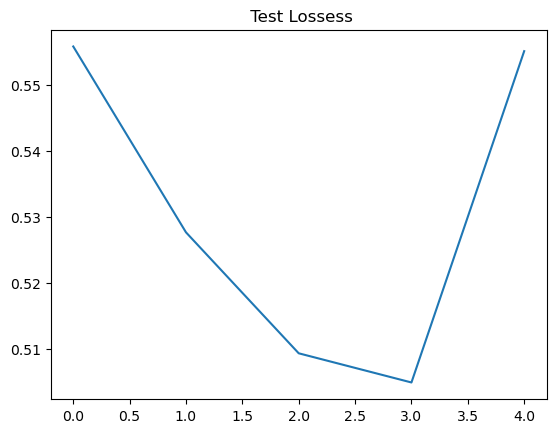

In [29]:
plt.plot(losses)
plt.title(" Test Lossess")